In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
rat = pd.read_excel('rat_criticality.xlsx', index_col = [0])
lq = pd.read_excel('loc_quotient.xlsx', index_col = [0])
xbase = pd.read_excel('xbase_critical.xlsx', index_col = [0])

In [3]:
lq = lq.clip(upper=10)

In [4]:
df_list = [rat, xbase, lq]

In [5]:
def plot_heatmaps(df_list, filenames, cmap1_list):
    font = 'Calibri'
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 11))  # 1 row, 3 columns
    labels = ['a', 'b', 'c']
    
    for i, (df, filename, cmap1, ax) in enumerate(zip(df_list, filenames, cmap1_list, axes)):
        df = df.apply(pd.to_numeric, errors='coerce')
        heatmap = sns.heatmap(df, cmap=cmap1, linecolor='white', linewidths=0.01, 
                              cbar=False, ax=ax)  # Disable default colorbar
        
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=10, fontname=font)
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, fontname=font)
        
        ax.set_xlabel("Regions", fontsize=10, fontname=font)
        ax.set_ylabel("Sectors", fontsize=10, fontname=font)
        
        # Customize spines
        for _, spine in ax.spines.items():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(0.5)
        
        # Manually add colorbar **below** each heatmap
        cax = fig.add_axes([ax.get_position().x0 - 0.03 + (0.055*i), ax.get_position().y0 - 0.125, 
                            ax.get_position().width, 0.01])  # Adjust position

        print(ax.get_position().x0 , ax.get_position().y0)
        cbar = plt.colorbar(heatmap.collections[0], cax=cax, orientation='horizontal')
        
        font_prop = FontProperties(family=font, size=11)
        vmin, vmax = cbar.vmin, cbar.vmax
        ticks = [vmin, vmin + (vmax - vmin) * 0.25, vmin + (vmax - vmin) * 0.5, vmin + (vmax - vmin) * 0.75, vmax]
        tick_labels = [f"{v:.3f}" for v in ticks]
        
        if filename == 'Location Quotient':
            tick_labels[-1] = '> 10'
        
        cbar.set_ticks(ticks)
        cbar.set_ticklabels(tick_labels)
        cbar.set_label(filename, fontsize=10, fontproperties=font_prop)
        cbar.ax.tick_params(labelsize=10)
        
        for label in cbar.ax.get_xticklabels():
            label.set_fontproperties(font_prop)
        
        # Add subplot labels ('a', 'b', 'c') at the **top right** of each heatmap
        ax.text(-0.1, -0.02, labels[i], transform=ax.transAxes, fontsize=12, fontweight='bold', 
                va='top', ha='right')

    plt.tight_layout()
    plt.savefig('Final_criticality.png', dpi=1200, bbox_inches='tight')
    plt.show()



0.125 0.10999999999999999
0.3985294117647059 0.10999999999999999
0.6720588235294118 0.10999999999999999


C:\Users\sva100\AppData\Local\Temp\ipykernel_13904\3703784760.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


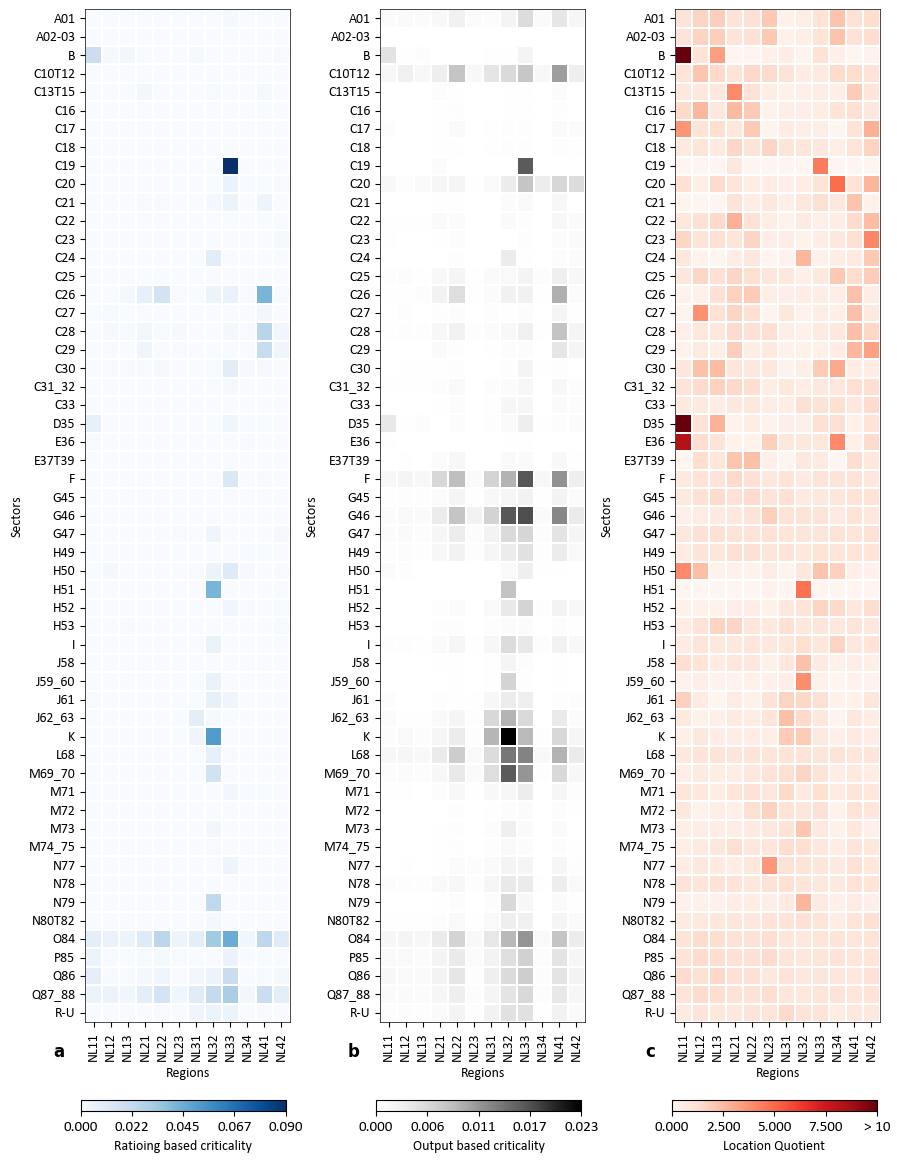

In [8]:
plot_heatmaps(df_list, ['Ratioing based criticality' , 'Output based criticality', 'Location Quotient' ], ['Blues', 'Greys', 'Reds'])